##PUNTO B:

---



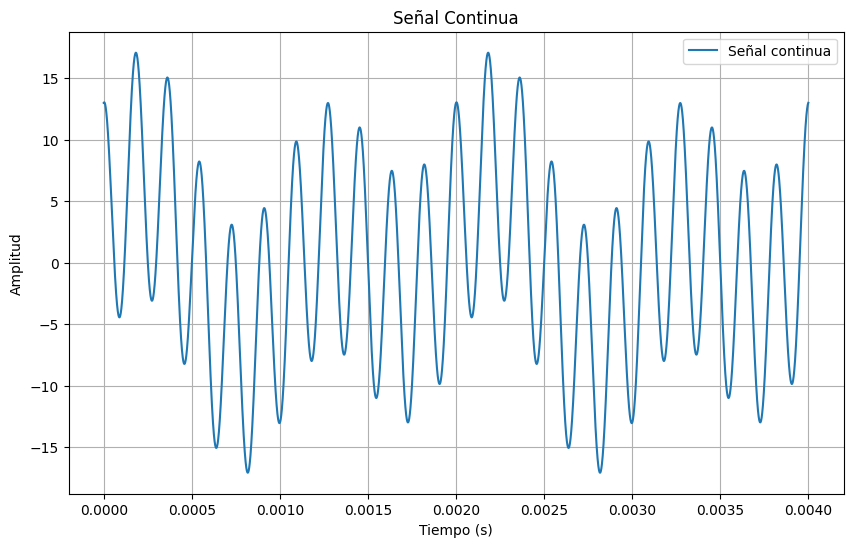

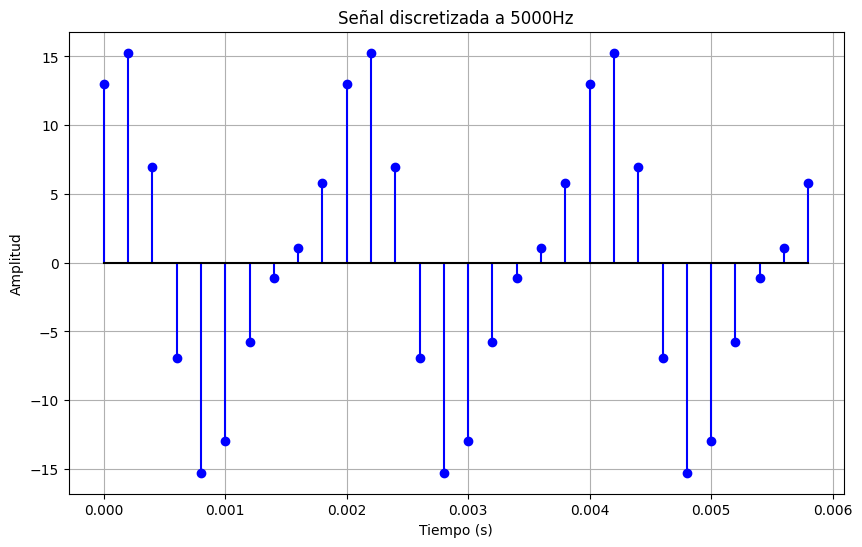

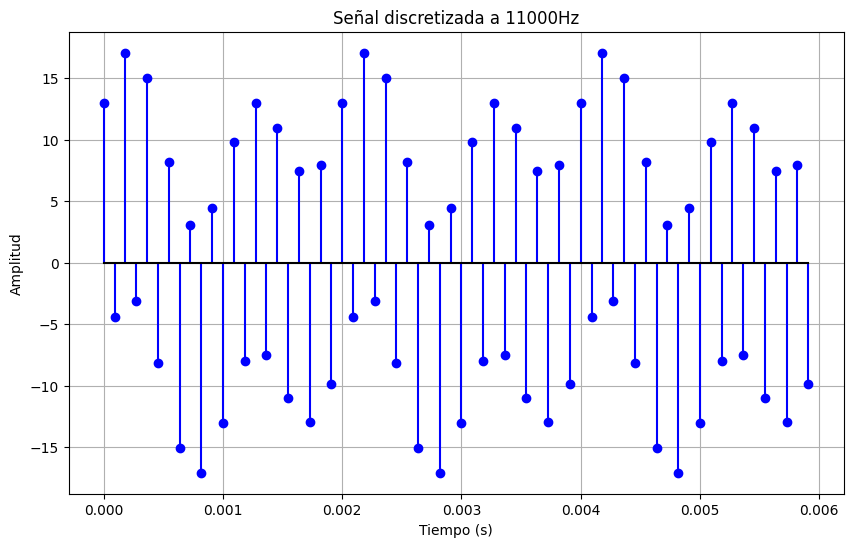

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.spatial.distance import cdist
#señal original
t_seconds= np.linspace(0, 0.004, 10000)
#Se define la funcion
x_function = 3*np.cos(1000*np.pi*t_seconds) + 5*np.sin(2000*np.pi*t_seconds) + 10*np.cos(11000*np.pi*t_seconds)

# Se grafica la señal x(t)
plt.figure(figsize=(10, 6)) # Tamaño de la figura
plt.plot(t_seconds, x_function, label='Señal continua') #Agregar leyendas y nombres al gráfico
plt.title('Señal Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

T = 1/5000   # Periodo de muestreo
t_seconds = np.arange(0,0.006, T)  # Vector de tiempo
 # Señal
x_function = 3*np.cos(1000*np.pi*t_seconds) + 5*np.sin(2000*np.pi*t_seconds) + 10*np.cos(11000*np.pi*t_seconds)

# Gráfica de la señal muestreada con la frecuencia de muestreo erronea
plt.figure(figsize=(10, 6))
plt.stem(t_seconds, x_function, linefmt='b-', markerfmt="bo", basefmt="k")
plt.title('Señal discretizada a 5000Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

#Se grafica de nueva la señal discretizada ya que la frecuencia de muestreo es erronea al ser menor que el doble de la frecuencia
T = 1/11000   # Periodo de muestreo
t_seconds = np.arange(0,0.006, T)  # Vector de tiempo
 # Señal
x_function = 3*np.cos(1000*np.pi*t_seconds) + 5*np.sin(2000*np.pi*t_seconds) + 10*np.cos(11000*np.pi*t_seconds)

# Gráfica de la señal muestreada organizando la frecuencia de muestreo
plt.figure(figsize=(10, 6))
plt.stem(t_seconds, x_function, linefmt='b-', markerfmt="bo", basefmt="k")
plt.title('Señal discretizada a 11000Hz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

##PUNTO C:

---



<ipython-input-22-f3ada1cf23cd>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


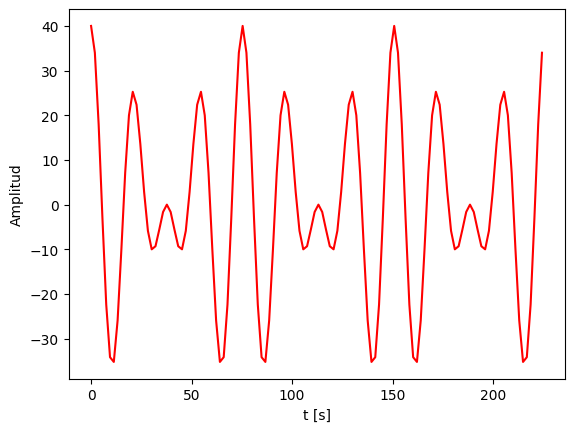

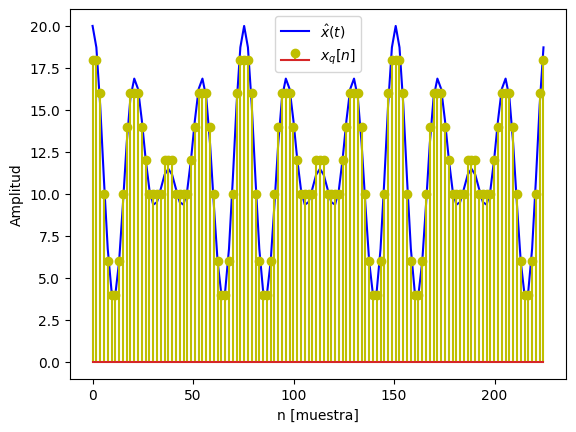

In [22]:
#función cero y pendiente creada por el profesor
def my_ceropend(x,xhmax=10,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido 1
T2 = 8*np.pi #perido 2
F1 = 1/T1
F2 = 1/T2
#perido cuasiperiódica
T = 24*np.pi
#frecuencia muestreo
Fs = 10*max(F1,F2)
#vector de tiempo
t = np.arange(0,3*T,1/Fs)
x = 20*(np.cos(t/3)+np.cos(t/4))

xhmax = 20
xhmin = 4
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10 llamando la funcion hecha por el profesor
#asegurar vector columna

#cuantizar
#número bits pedidos en la pregunta
nbits = 4
#cantidad de estados
Ne = 2**nbits
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#Vector columna
#señal cuantizada
xq = np.zeros(len(xh))
#recorrer señal
for i in range(len(xh)):
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

#gráficas de señales
plt.plot(t,x,'r',label='$x(t)$')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='$\hat{x}(t)$')
plt.stem(t,xq,'y',label='$x_{q}[n]$')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()